# Hamiltonian of a single photon

by Artem Koryukin

QWorld Summer Research Internship

QIntern 2020

The case describes the single waveguide as driven quantum two-level system.
This was taken from the QuTiP Lecture: Photon Scattering in Quantum Optical Systems.
https://github.com/qutip/qutip-notebooks/blob/master/examples/temporal-photon-scattering.ipynb

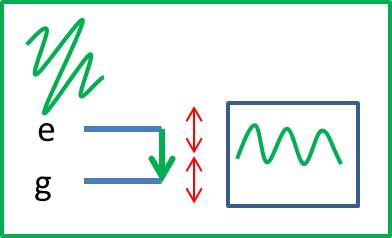

Main diagram of the considered Hamiltonian (Two-level system, outside pulse, cavity, photon)

The system Hamiltonians:

\begin{equation} 
H_\textrm{S}(t) = \begin{cases} 
H_\textrm{0S}+ H_\textrm{1S}(t), & \text{if } 0<t<T_P\\ 
H_\textrm{0S}, & \text{otherwise}. 
\end{cases} 
\end{equation} 

For solution:

$$ \textrm{i}\frac{\partial}{\partial t}\left|\Psi_\textrm{I}(t)\right>=H_\textrm{I}(t)\left|\Psi_\textrm{I}(t)\right>. $$  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
!pip install --upgrade qutip
from qutip import * 


     |████████████████████████████████| 3.4MB 4.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for qutip: filename=qutip-4.5.2-cp36-cp36m-linux_x86_64.whl size=12575424 sha256=b34e9ae274e2e1a69a0cc79ac9767e05e4e26c771aa0449f5aada45faca327f6
  Stored in directory: /root/.cache/pip/wheels/ae/90/e9/f26fdecfb6c0e9d9d6f5fa564d16d26ff2bdfd8ad6e7a8a28a
Successfully built qutip


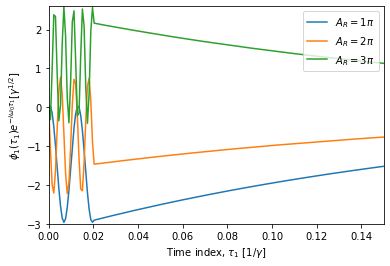

In [ ]:
# Pulse parameters
w0    = 10 * 2 * np.pi               # arbitrary laser frequency
gamma = 10.0                          # arbitrary coupling constant

# Operators
sm   = np.sqrt(gamma) * destroy(2)   # TLS coupled collapse operator
psi0 = basis(2,0)                    # starting state |psi(0)> = |0>

def Htls(gamma, pulseLength, pulseArea):
    RabiFreq = pulseArea / (2*pulseLength)
    
    # Bare Hamiltonian for a TLS
    H0S = w0 * create(2) * destroy(2)  

    # Define H_1S(t)
    H1S1 = lambda t, args: RabiFreq * 1j*np.exp(-1j*w0*t) * (t < pulseLength) 
    H1S2 = lambda t, args: RabiFreq * -1j*np.exp(1j*w0*t) * (t < pulseLength)
    
    # Put the Hamiltonian in QuTiP list-callback form
    return [H0S - 1j/2 * sm.dag() * sm, 
            [sm.dag(), H1S1], 
            [sm, H1S2]]

T = 200
tlist = np.linspace(0,1.5/gamma,T)
pulse_length = 0.2 / gamma
pulse_areas = [np.pi, 2*np.pi, 3*np.pi]

# Envelopes of single-photon amplitudes for diﬀerent pulse area
for pulse_area in pulse_areas:
    # Use construct_effective_hamiltonian=False since we are providing H_eff in this case
    scattered_state = temporal_scattered_state(Htls(gamma, pulse_length, pulse_area), psi0, 1, [sm], tlist, 
                                               construct_effective_hamiltonian = False)
    amplitudes = []
    for i in range(T):
        amplitudes.append((temporal_basis_vector([[i]], T).dag() * scattered_state).full().item())
    # Adjust amplitudes for time evolution
    amplitudes = np.real(np.array(amplitudes) * np.exp(1j * w0 * tlist))
    plt.plot(tlist, amplitudes, label = "$A_R = {}\pi$".format(round(pulse_area / np.pi)))
    
plt.ylim(-3,2.6)
plt.xlim(tlist[0],tlist[-1])
plt.xlabel('Time index, $\\tau_1$ [$1/\gamma$]')
plt.ylabel('$\phi_1 ( \\tau_1) e^{-i \omega_0 \\tau_1} [\gamma^{1/2}]$')
plt.legend(loc = 'upper right')
plt.show()

The scattering amplitude of a single-photon emission as a function of time (Envelopes of single-photon amplitudes for diﬀerent pulse areas).

In [ ]:
from qutip.ipynbtools import version_table
version_table()

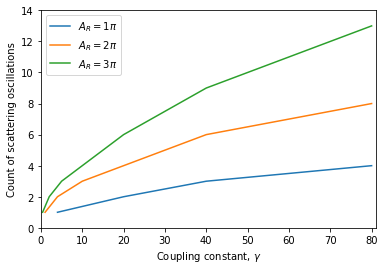

In [ ]:
x = [4,20,40,80] 
y = [1,2,3,4]
plt.plot(x, y, label = "$A_R = {}\pi$".format(round(np.pi / np.pi))) 

x = [1,4,10,20,40,80] 
y = [1,2,3,4,6,8]
plt.plot(x, y, label = "$A_R = {}\pi$".format(round(2*np.pi / np.pi)))  

x = [0.4,2,5,10,20,40,80] 
y = [1,2,3,4,6,9,13]
plt.plot(x, y, label = "$A_R = {}\pi$".format(round(3*np.pi / np.pi)))

plt.ylim(0,14)
plt.xlim(0,81)
plt.xlabel('Coupling constant, $\gamma$')
plt.ylabel('Count of scattering oscillations')
plt.legend(loc = 'upper left')



plt.savefig('fig3.jpeg')
plt.show()


# A Photon in Cavity

Here add the coupling

The source-photon-cavity system can be described using the Jaynes–Cummings model \cite{Keeling}. The Hamiltonian of the system consists of the photon part responsible for the birth and destruction of photons. The other part is responsible for the source. It's usually an atom. This part is represented as a two-level system consisting of the excited and ground states. And then there is the part responsible for the interaction of the atom and the photon.

\begin{equation}
H_{J.C}=\sum_k w_k a_k^{\dagger} a_k + \sum_{i,k} [{\epsilon}_i {\sigma}_i^z + g_{i,k} {\sigma}_i^+ a_k +H.c.], 
\end{equation}

\begin{equation}
\hat{H}= h w \hat{a}^{\dagger} \hat{a} + \frac{1}{2} h w_A \hat{{\sigma}_z} - h g (\hat{a} \hat{\sigma}^{\dagger} + \hat{a}^{\dagger} \hat{\sigma}),
\end{equation}

where $w_k$ is the frequency of the $k$ photon modes, the operators of the birth $a^{\dagger}$  and the death $a$  of the photon, $\epsilon$ is the energy between the lowest two atomic levels, ${\sigma}^z$ is the operator of inversion of atomic levels, which returns the atom to its initial state or transferring to an excited state, $g$ is the coupling constant between the two-level system and photon, operators increase ${\sigma}^+$ and decrease ${\sigma}^-$ the energy of the atom. When this energy decreases, the photon is emitted, and when the photon dies, the energy is absorbed. $k$ is the photon mode number. $i$ is the number of the atom or atomic mode. Therefore, the first Hamiltonian  describes the case of many modes and the second Hamiltonian  describes the case of one photon and one atom. The Dicke model \cite{Keeling} is used when we consider rapidly oscillating term of the Hamiltonian, we get next Hamiltonian:

\begin{equation} 
H=\sum_i {\epsilon}_i {\sigma}_i^z + w a^{\dagger} a + \sum_i \frac{g}{2} (a^{\dagger} + a)({\sigma}_i^+ + {\sigma}_i^-).
\end{equation}

It appears due to the summing of the frequency of the external field and the frequency of system levels. Slow components appear when frequencies are subtraction. This is the so-called detuning frequency between the frequencies of field and levels of the system. So is full Hamiltonian.

A single-photon source is used as the photon source. So such system emits only one photon at a time. Single molecules, Rydberg atoms, color centers in a diamond, and quantum dots can be used as such a source. The photon located into a cavity, which it can be as a Fabry-Perot cavity, a distributed Bragg reflector, a photonic crystal, or a waveguide.

In other words, the photon is confinement between walls, which it can be spherical or flat mirrors or dielectric structures. At the moment, good alternatives of mirrors are the distributed Bragg reflector and the photonic crystal. A distributed Bragg reflector is a periodic structure of dielectric layers with different refractive index. A photonic crystal is characterized by dispersion relations that it consist of allowed and forbidden bands for photons, as for an electron in a semiconductor. A waveguide is a core-shell system of dielectrics with different refractive index. Modern improved waveguides can contain a distributed Bragg reflector or a photonic crystal instead of a simple dielectric shell. The photon will out of the desired system without the cavity. Thus, the trapped photon lives in the cavity for some time. To sum up, we get the following process. The two-level system spontaneously emits a photon. It is located in the resonator for a while. Then it is scattered on the walls of the cavity or it is transmitted through them or it is absorbed by the atom. This results to create the complex coupled system consiste of an atom, a photon, and a cavity. 

Rabi oscillations are used to obtain the superposition state of the qubit. They occur when an electromagnetic field, such as a laser beam, is applied to a two-level system. The qubit levels begin to oscillate with the Rabi frequency. The system will be in a superposition of two states if we applying a pulse with defined time-area. Thus, we can encode information by controlling the frequency of the system using the external pulse, setting the necessary state of the qubit. If we choose a time pulse less than the time of transition from one state to another, we will between these two states as in superposition.

# The Effect of the Coupling Constant

We used the effective Hamiltonian from \cite{Fischer}.

\begin{equation} 
H_{eff}(t)=H_{0S}+H_{1S}(t)-i\frac{\gamma}{2}{\sigma}^{\dagger}{\sigma},
\end{equation}

\begin{equation} 
H_\textrm{1S}(t) = \begin{cases} 
\Omega (i e^{-i w_0 t} {\sigma}^{\dagger} - i e^{i w_0 t} {\sigma}), & \text{if } 0<t<T_P\\ 
0, & \text{otherwise}. 
\end{cases}, 
\end{equation} 

\begin{equation} 
H_{0S}=w_0 {\sigma}^{\dagger} {\sigma},
\end{equation}

\begin{equation} 
\Omega = \frac{A_R}{2 T_P},
\end{equation}

where $H_{0S}$ is the Hamiltonian of two-level system, $H_{1S}(t)$ is the interaction Hamiltonian of the external field and a two-level system, $\gamma$ is the coupling constant between the system and the waveguide, $\Omega$  is the frequency of the Rabi frequency of the system, $t$   is the time pulse, $A_R$   the pulse area, $T_P$ is the pulse length.

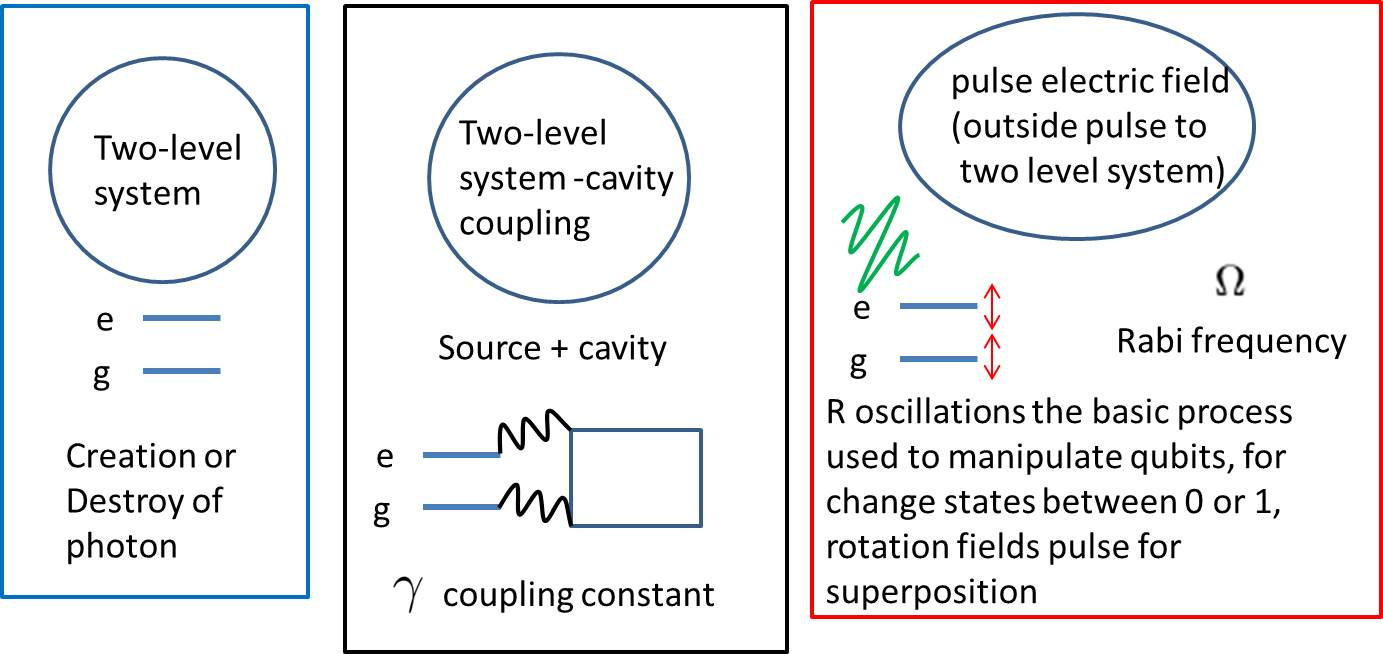

Diagram of the parts of the considered Hamiltonian a) a two-level system b) the coupling between the system and the waveguide C) the interaction of the external field and the two-level system

The Rabi frequency is inversely proportional to the pulse length, which it is inversely proportional to the coupling constant. It turns out that the Rabi frequency directly depends on the pulse area and the coupling constant. The stronger the connection or the greater the pulse is the higher the Rabi frequency. So, we can influence of system parameter on the main parameter of the qubit.

 We changed coupling constant from 0.1 to 80. 

 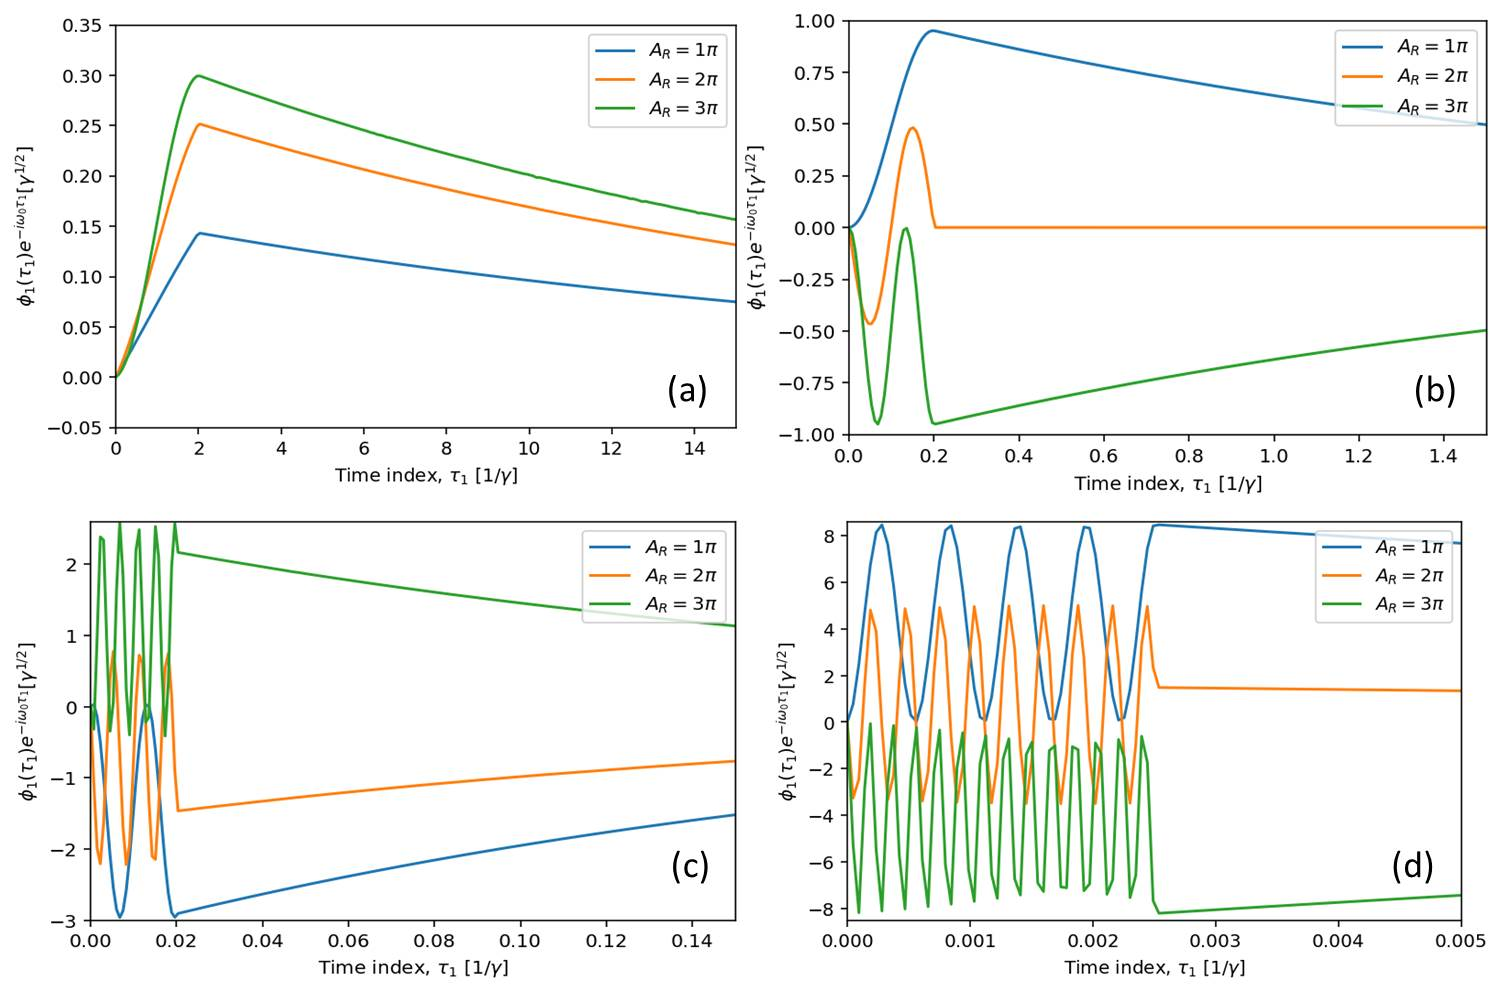

Envelopes of single-photon amplitudes for different pulse areas at the different values of the coupling constant a) $\gamma=$0.1 b) $\gamma=$1 c) $\gamma=$0 d) $\gamma=$80.

As we can see from the previous figure, the number of oscillations increases when the coupling constant between the two-level system and the waveguide increases, as shown in figure.

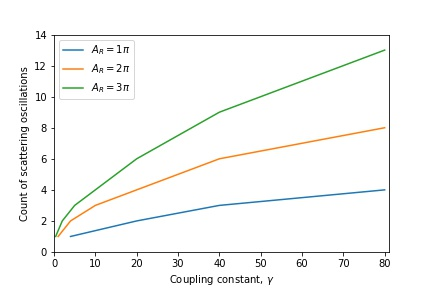

Dependence of the number of scattering oscillations on the coupling constant between the two-level system and the waveguide.



# Encoding Information

How do you define a qubit in such a system. 

Qubit states can be interpreted as state with a minimum photon scattering amplitude and state with a maximum photon scattering amplitude. The entire envelope will be a superposition state. We tuning the time of the external pulse and so we set the superposition state of the qubit. It is between two opposite states a photon.